In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('fi')
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv',nrows = 50000)

In [3]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 50.7+ MB


In [5]:
train.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,50000.000000,50000.000000,2.825600e+04,2.827300e+04,2.827300e+04,28757.000000,2.825600e+04,2.825600e+04,2.875900e+04,2.825000e+04,...,2.825300e+04,2.825000e+04,27883.000000,2.875900e+04,2.825600e+04,2.825600e+04,28757.000000,50000.000000,2.825100e+04,2.822900e+04
mean,50022.312260,0.761280,1.627072e+00,7.465676e+00,4.141489e+00,8.748120,2.431846e+00,2.481129e+00,1.497303e+00,9.021133e+00,...,2.741965e+00,6.806724e+00,3.564653,9.174948e-01,1.673111e+00,3.241485e+00,2.032836,0.311680,1.927961e+00,1.730599e+00
std,28868.452809,0.426306,1.087547e+00,2.966589e+00,1.149752e+00,2.035407,5.905720e-01,5.839629e-01,2.763315e+00,1.914957e+00,...,1.359786e+00,1.787556e+00,2.614468,2.091862e+00,5.030066e-01,1.626610e+00,1.072649,0.696064,1.262579e+00,1.126751e+00
min,3.000000,0.000000,-9.996497e-07,-5.829745e-07,-5.139327e-07,1.015466,-6.111700e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.718290e-07,-8.650618e-07,0.139245,-9.993112e-07,7.963046e-08,-9.223798e-07,0.100454,0.000000,-9.824168e-07,-9.997049e-07
25%,25046.500000,1.000000,9.081862e-01,5.313193e+00,3.475341e+00,7.626093,2.062080e+00,2.101071e+00,8.658958e-02,7.851294e+00,...,1.789831e+00,5.636363e+00,1.967007,2.052545e-02,1.419520e+00,2.095875e+00,1.397034,0.000000,1.108055e+00,1.008403e+00
50%,49997.000000,1.000000,1.463753e+00,7.027493e+00,4.198941e+00,8.673604,2.408972e+00,2.447977e+00,3.892663e-01,9.037901e+00,...,2.433735e+00,6.728972e+00,2.742854,1.398637e-01,1.614076e+00,2.967717e+00,1.799131,0.000000,1.560976e+00,1.585366e+00
75%,75045.500000,1.000000,2.132564e+00,9.457496e+00,4.831845e+00,9.773080,2.772964e+00,2.831246e+00,1.633104e+00,1.021097e+01,...,3.385715e+00,7.906976e+00,4.112192,8.623687e-01,1.843418e+00,4.114361e+00,2.394756,0.000000,2.331035e+00,2.249999e+00
max,99900.000000,1.000000,2.000000e+01,1.887158e+01,1.183178e+01,20.000000,8.679004e+00,8.888889e+00,2.000000e+01,2.000000e+01,...,1.080301e+01,2.000000e+01,18.252446,2.000000e+01,1.563161e+01,1.760204e+01,13.052589,11.000000,2.000000e+01,2.000000e+01


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(train.select_dtypes(include=numerics).columns)
train = train[numerical_vars]
train.shape

(50000, 114)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(labels=['target', 'ID'], axis=1),
    train['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

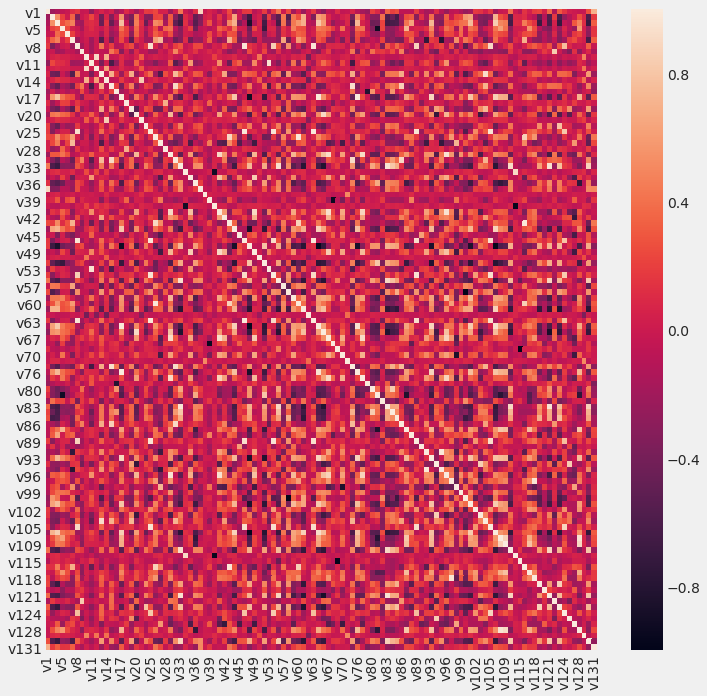

In [14]:
plt.style.use('fivethirtyeight')
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)